# Perkenalanan

# Problem Statement

# Objective

# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Loading

- tampilkan sumber dataset yang kalian gunakan + informasi dari atribut dan deskripsi dari atribut yang ada pada daset.

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA

- Cek Duplikasi Data
- Cek Missing Values
- Cek Cardinality
- Analisa Statistika Deskriptif
- Cek Korelasi (Menggunakan Visualisasi Data - Scatter Plot)

In [4]:
df.duplicated().sum()

1

In [5]:
df.duplicated?

Signature:
df.duplicated(
    subset: 'Hashable | Sequence[Hashable] | None' = None,
    keep: 'DropKeep' = 'first',
) -> 'Series'
Docstring:
Return boolean Series denoting duplicate rows.

Considering certain columns is optional.

Parameters
----------
subset : column label or sequence of labels, optional
    Only consider certain columns for identifying duplicates, by
    default use all of the columns.
keep : {'first', 'last', False}, default 'first'
    Determines which duplicates (if any) to mark.

    - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
    - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
    - False : Mark all duplicates as ``True``.

Returns
-------
Series
    Boolean series for each duplicated rows.

See Also
--------
Index.duplicated : Equivalent method on index.
Series.duplicated : Equivalent method on Series.
Series.drop_duplicates : Remove duplicate values from Series.
DataFrame.drop_duplicates : Remove duplica

In [6]:
df[df.duplicated(keep='first')]
# df.loc[df.duplicated(), :]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
cat_cols= list(df.select_dtypes(include='object'))
num_cols= list(df.select_dtypes(include='number'))
# num_cols= df.select_dtypes(include='number').columns

print('data kategorikal:\n',cat_cols, sep='')
print('data numerikal:\n',num_cols)

data kategorikal:
['sex', 'smoker', 'region']
data numerikal:
 ['age', 'bmi', 'children', 'charges']


In [10]:
# cek cardinality
for col in cat_cols:
  print(f'jumlah nilai unik pada kolom {col}: {df[col].nunique()}\nnilainya:{df[col].unique()}',end='\n\n')

jumlah nilai unik pada kolom sex: 2
nilainya:['female' 'male']

jumlah nilai unik pada kolom smoker: 2
nilainya:['yes' 'no']

jumlah nilai unik pada kolom region: 4
nilainya:['southwest' 'southeast' 'northwest' 'northeast']



In [11]:
df[cat_cols].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [12]:
df['sex'].value_counts(normalize=True)

sex
male      0.504862
female    0.495138
Name: proportion, dtype: float64

In [13]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [14]:
df.describe(include='number')

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df[num_cols].describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Insight:
- Distribusi data lebih cenderung normal (simetris) untuk atribut `age`, hal ditandai dengan nilai mean dan median yang berdekatan.
- Sebagian besar pengguna asuransi itu berusia kisaran 39 atau pada rentang (25-53)

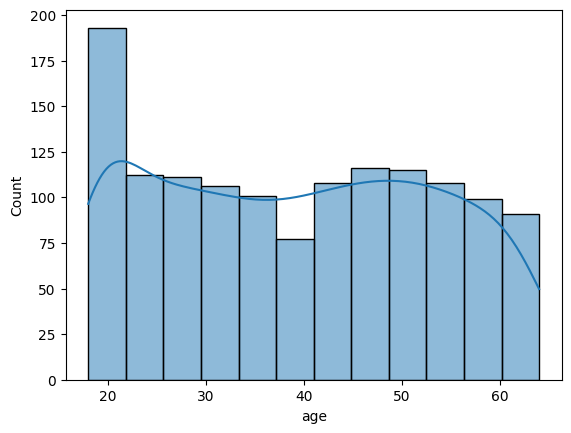

In [16]:
sns.histplot(data=df, x='age', kde=True);

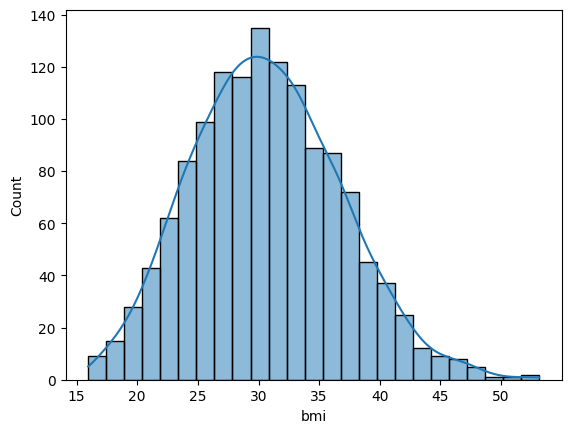

In [17]:
sns.histplot(data=df, x='bmi', kde=True);

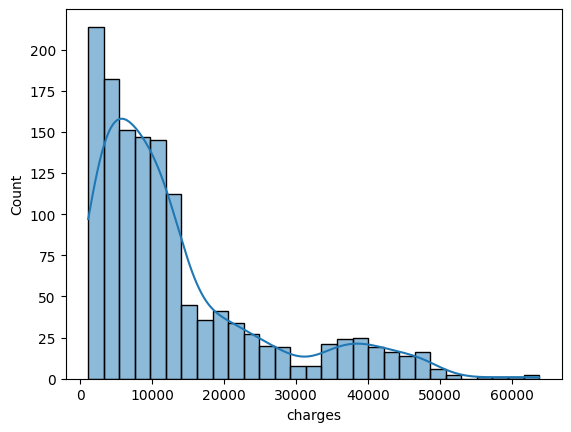

In [18]:
sns.histplot(data=df, x='charges', kde=True);

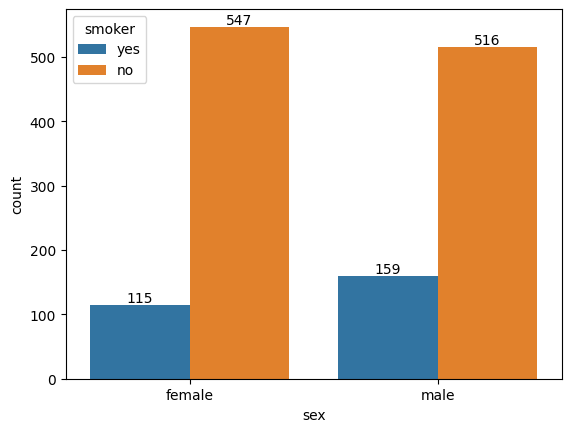

In [19]:
smoker_status= sns.countplot(df, x='sex', hue='smoker')
for container in smoker_status.containers:
  smoker_status.bar_label(container)

plt.show()

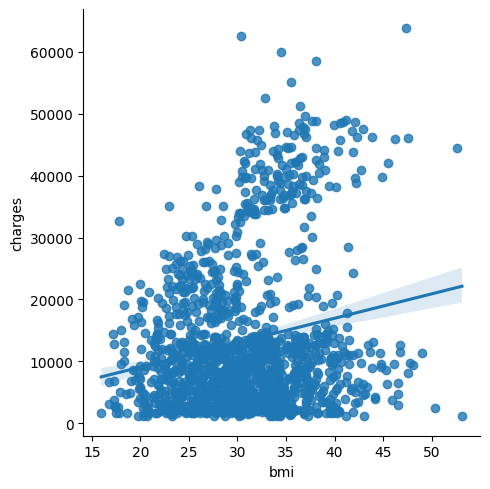

In [20]:
sns.lmplot(data=df, x='bmi',y='charges');

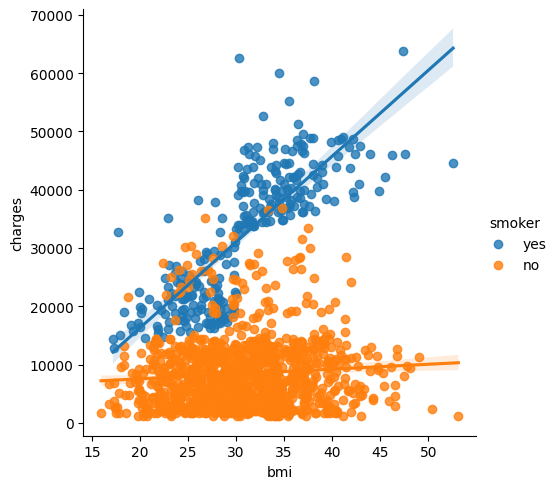

In [21]:
sns.lmplot(data=df, x='bmi',y='charges',hue='smoker');

In [22]:
df[num_cols].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [23]:
df.query('smoker=="yes"')[num_cols].corr()

,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


In [24]:
df.query('smoker=="no"')[num_cols].corr()

,age,bmi,children,charges
age,1.000000,0.122745,0.032219,0.627400
bmi,0.122745,1.000000,0.019207,0.084077
children,0.032219,0.019207,1.000000,0.138109
charges,0.627400,0.084077,0.138109,1.000000


# Data Preprocessing
- Split Data
- Cek distribusi data di data train (lakukan di fitur numerik)
- Handling outlier
- Handling missing values
- Encoding
- Scaling (lakukan hanya untuk fitur numerik diskrit atau kontinu)
- Seleksi Fitur

In [25]:
X= df.drop(columns='charges')
y= df['charges']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(f'dimensi X_train: {X_train.shape}')
print(f'dimensi X_test: {X_test.shape}')

dimensi X_train: (1069, 6)
dimensi X_test: (268, 6)


In [26]:
X_train['sex']= X_train['sex'].replace({'male':1, 'female':0})

In [27]:
X_test['sex']= X_test['sex'].replace({'male':1, 'female':0})

In [28]:
X_train

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,no,northeast
968,21,1,25.745,2,no,northeast
599,52,0,37.525,2,no,northwest
170,63,1,41.470,0,no,southeast
275,47,0,26.600,2,no,northeast
...,...,...,...,...,...,...
1096,51,0,34.960,2,yes,northeast
1131,27,1,45.900,2,no,southwest
1295,20,1,22.000,1,no,southwest
861,38,0,28.000,3,no,southwest


In [29]:
smoker_cat=['no','yes']

ordinal_enc= OrdinalEncoder(categories=[smoker_cat])

ordinal_enc.fit(X_train[['smoker']])
X_train['smoker']= ordinal_enc.transform(X_train[['smoker']])
X_test['smoker']= ordinal_enc.transform(X_test[['smoker']])

In [30]:
X_train.head()

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0.0,northeast
968,21,1,25.745,2,0.0,northeast
599,52,0,37.525,2,0.0,northwest
170,63,1,41.470,0,0.0,southeast
275,47,0,26.600,2,0.0,northeast


In [31]:
cat_ohe=['region']
ohe_enc= OneHotEncoder(sparse_output=False)

ohe_enc.fit(X_train[cat_ohe])

OneHotEncoder(sparse_output=False)

In [32]:
ohe_enc.get_feature_names_out()

array(['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [33]:
X_train_ohe= pd.DataFrame(ohe_enc.transform(X_train[cat_ohe]),
                          columns=ohe_enc.get_feature_names_out())

X_test_ohe= pd.DataFrame(ohe_enc.transform(X_test[cat_ohe]),
                          columns=ohe_enc.get_feature_names_out())

In [34]:
X_train_ohe.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [35]:
# reset index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [36]:
X_train.drop(columns=cat_ohe,axis=1,inplace=True)
X_test.drop(columns=cat_ohe,axis=1,inplace=True)

X_train_new= pd.concat([X_train, X_train_ohe], axis=1)
X_test_new= pd.concat([X_test, X_test_ohe], axis=1)

In [37]:
X_train_new

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,23,1,24.510,0,0.0,1.0,0.0,0.0,0.0
1,21,1,25.745,2,0.0,1.0,0.0,0.0,0.0
2,52,0,37.525,2,0.0,0.0,1.0,0.0,0.0
3,63,1,41.470,0,0.0,0.0,0.0,1.0,0.0
4,47,0,26.600,2,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1064,51,0,34.960,2,1.0,1.0,0.0,0.0,0.0
1065,27,1,45.900,2,0.0,0.0,0.0,0.0,1.0
1066,20,1,22.000,1,0.0,0.0,0.0,0.0,1.0
1067,38,0,28.000,3,0.0,0.0,0.0,0.0,1.0


In [38]:
num_cols

['age', 'bmi', 'children', 'charges']

In [39]:
features_num_cols= ['age', 'bmi', 'children']

In [40]:
# scaling
scaler= StandardScaler()
scaler.fit(X_train_new[features_num_cols])

X_train_new[features_num_cols]= scaler.transform(X_train_new[features_num_cols])
X_test_new[features_num_cols]= scaler.transform(X_test_new[features_num_cols])

In [41]:
X_train_new.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.157680,1,-0.996928,-0.907908,0.0,1.0,0.0,0.0,0.0
1,-1.300619,1,-0.792762,0.766904,0.0,1.0,0.0,0.0,0.0
2,0.914926,0,1.154664,0.766904,0.0,0.0,1.0,0.0,0.0
3,1.701087,1,1.806837,-0.907908,0.0,0.0,0.0,1.0,0.0
4,0.557580,0,-0.651417,0.766904,0.0,1.0,0.0,0.0,0.0


In [42]:
X_test_new.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.700518,1,-1.326734,-0.907908,0.0,1.0,0.0,0.0,0.0
1,-0.728865,0,-0.816733,2.441716,0.0,0.0,0.0,0.0,1.0
2,0.843457,0,0.966203,1.604310,0.0,0.0,1.0,0.0,0.0
3,-0.585927,1,0.636397,1.604310,1.0,0.0,1.0,0.0,0.0
4,-0.585927,1,1.297663,0.766904,0.0,0.0,0.0,1.0,0.0


# Model Development

- Linear Regression

In [43]:
linreg= LinearRegression()
linreg.fit(X_train_new, y_train)

LinearRegression()

In [44]:
print(f'intercept: {linreg.intercept_}')
print(f'coef: {linreg.coef_}')

intercept: 8475.496989553278
coef: [ 3472.97555343  -101.54205399  1927.82825101   636.5011853
 23077.76459287   472.45520552    80.69375073  -366.46441021
  -186.68454604]


In [45]:
y_pred_train= linreg.predict(X_train_new)
y_pred_test= linreg.predict(X_test_new)

In [46]:
print(f'MAE train: {mean_absolute_error(y_train, y_pred_train)}')
print(f'MAE test: {mean_absolute_error(y_test, y_pred_test)}')

MAE train: 4181.901537775145
MAE test: 4177.045561036319


In [47]:
print(f'R2 score train: {linreg.score(X_train_new, y_train)}')
print(f'R2 score test: {linreg.score(X_test_new, y_test)}')

R2 score train: 0.7299057809339075
R2 score test: 0.8069287081198018


In [48]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
list_fs= ['age', 'bmi', 'children', 'smoker']
X_train_fs= X_train_new[list_fs]
X_test_fs= X_test_new[list_fs]


rf= RandomForestRegressor()
rf.fit(X_train_fs, y_train)

RandomForestRegressor()

In [51]:
y_pred_train= rf.predict(X_train_fs)
y_pred_test= rf.predict(X_test_fs)

print(f'MAE train: {mean_absolute_error(y_train, y_pred_train)}')
print(f'MAE test: {mean_absolute_error(y_test, y_pred_test)}')

print(f'R2 score train: {rf.score(X_train_fs, y_train)}')
print(f'R2 score test: {rf.score(X_test_fs, y_test)}')

MAE train: 1020.9889924395568
MAE test: 2777.447186178624
R2 score train: 0.9736347318669215
R2 score test: 0.8651593985024019


# Model Evaluation

# Kesimpulan dan Rekomendasi

- Rekomendasi dari sisi model
- Rekomendasi dari sisi bisnis

# Model Inference